In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR&EEG_2022.08.11_final.csv")

In [49]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 1]=encoder.fit_transform(dataset.iloc[:, 1])

In [50]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]


In [51]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)

Number Of Best Features: 20
                         Specs      Score
182    p3_gap_peak_50msmp_50ms  29.777286
178    p1_gap_peak_50msmp_50ms  28.943612
207     gap_50msuc_n1p2_R_50ms  28.830587
168   p1p2_interval_nogap_50ms  27.979853
173   n1p3_interval_nogap_50ms  25.788322
181    n2_gap_peak_50msmp_50ms  24.112113
165   n0n2_interval_nogap_50ms  21.890297
200   p2n2_gap_nogap_diff_50ms  18.730306
73      gap_20msuc_n1p2_L_20ms  18.182582
209     gap_50msuc_n1p2_L_50ms  17.552783
71      gap_20msuc_n1p2_R_20ms  17.456283
46     p3_gap_peak_20msmp_20ms  16.757489
204     gap_50msuc_p1n1_R_50ms  16.445111
45     n2_gap_peak_20msmp_20ms  15.906518
42     p1_gap_peak_20msmp_20ms  15.880902
1          n1_gap_peak_ms_20ms  15.558168
33    p1n2_interval_nogap_20ms  15.009325
175   p2p3_interval_nogap_50ms  14.595137
211     gap_50msuc_n1p2n2_50ms  14.096806
187  n2_nogap_peak_50msmp_50ms  13.753050


In [52]:
list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])

In [53]:
X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 1]

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=7,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[13  2]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.88      0.78      0.82        18

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33

Accurecy:  0.8181818181818182


In [11]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.2 MB/s 


In [12]:


explainer = shap.Explainer(rf_estimator.predict, X_test)

shap_values = explainer( X_test)
features_names=list(dataset.iloc[0:0, 4:])

In [19]:
shap_values.shape

(33, 20)

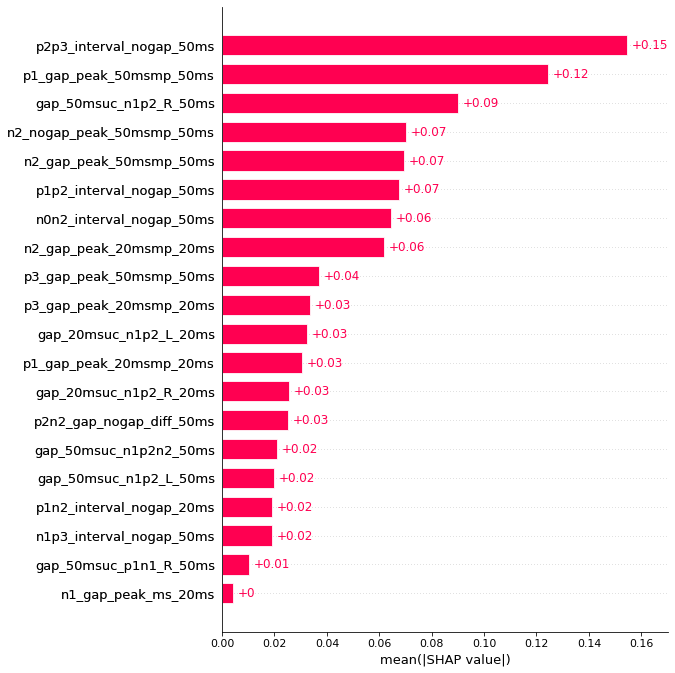

In [13]:

shap.plots.bar(shap_values,max_display=20)

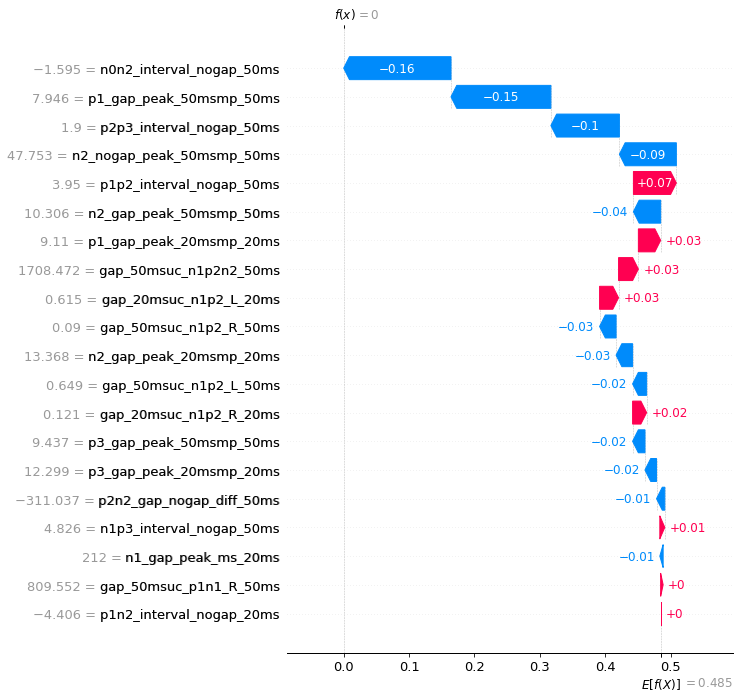

In [15]:

shap.plots.waterfall(shap_values[0],max_display=20)

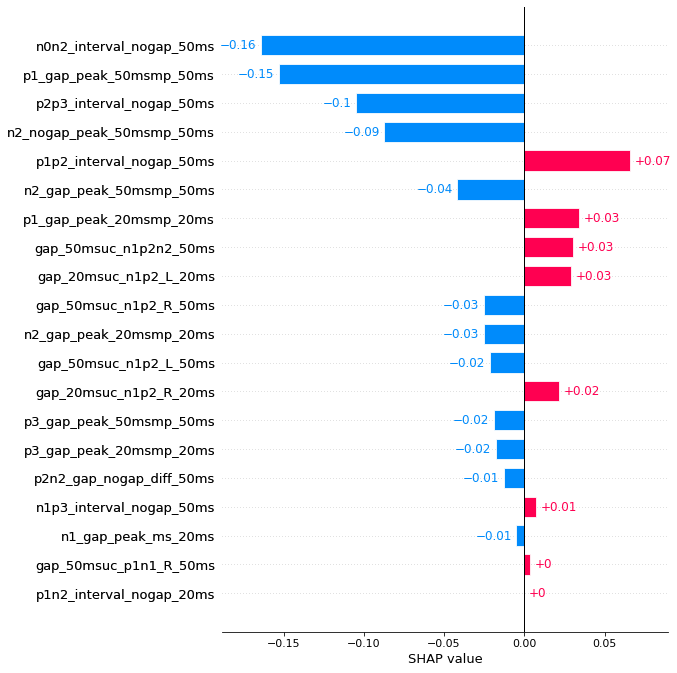

In [20]:

shap.plots.bar(shap_values[0],max_display=20)